# Food Classification 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect the dataset

In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['pizza' 'steak']


##For better visualisation we are going to plot the images

In [ ]:
# Function for plotting image
def plot_image(target_dir, target_class):
  # Setup target directory 
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


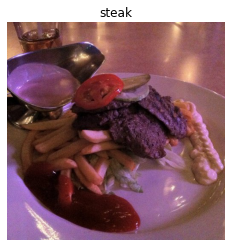

In [ ]:
img1 = plot_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (384, 512, 3)


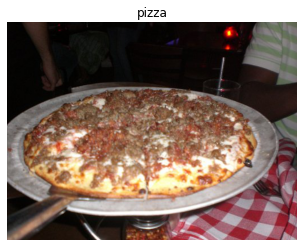

In [ ]:
img2 = plot_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
img1

array([[[134,  91,  72],
        [130,  85,  66],
        [132,  85,  65],
        ...,
        [126,  72,  70],
        [122,  68,  66],
        [133,  80,  76]],

       [[126,  81,  62],
        [121,  76,  57],
        [139,  92,  72],
        ...,
        [136,  82,  80],
        [130,  76,  74],
        [133,  79,  77]],

       [[133,  88,  69],
        [127,  82,  61],
        [133,  86,  66],
        ...,
        [131,  77,  75],
        [129,  75,  73],
        [124,  70,  68]],

       ...,

       [[145, 105, 165],
        [143, 103, 163],
        [140, 100, 160],
        ...,
        [158, 117, 115],
        [157, 116, 114],
        [153, 112, 110]],

       [[151, 111, 173],
        [148, 108, 170],
        [145, 105, 167],
        ...,
        [136,  95,  93],
        [139,  98,  96],
        [145, 104, 102]],

       [[153, 113, 175],
        [151, 111, 173],
        [149, 109, 171],
        ...,
        [142, 102, 100],
        [134,  93,  91],
        [130,  89,  87]]

In [ ]:
img1.shape

(512, 512, 3)

In [ ]:
img1/255. 

array([[[0.5254902 , 0.35686275, 0.28235294],
        [0.50980392, 0.33333333, 0.25882353],
        [0.51764706, 0.33333333, 0.25490196],
        ...,
        [0.49411765, 0.28235294, 0.2745098 ],
        [0.47843137, 0.26666667, 0.25882353],
        [0.52156863, 0.31372549, 0.29803922]],

       [[0.49411765, 0.31764706, 0.24313725],
        [0.4745098 , 0.29803922, 0.22352941],
        [0.54509804, 0.36078431, 0.28235294],
        ...,
        [0.53333333, 0.32156863, 0.31372549],
        [0.50980392, 0.29803922, 0.29019608],
        [0.52156863, 0.30980392, 0.30196078]],

       [[0.52156863, 0.34509804, 0.27058824],
        [0.49803922, 0.32156863, 0.23921569],
        [0.52156863, 0.3372549 , 0.25882353],
        ...,
        [0.51372549, 0.30196078, 0.29411765],
        [0.50588235, 0.29411765, 0.28627451],
        [0.48627451, 0.2745098 , 0.26666667]],

       ...,

       [[0.56862745, 0.41176471, 0.64705882],
        [0.56078431, 0.40392157, 0.63921569],
        [0.54901961, 0

## Classification 
1. Inspect Data
2. Pre-process Data
3. Creating Model
4. Fit the model
5. Evaluate the Model

In [ ]:
train_part = "pizza_steak/train"
test_part = "pizza_steak/test"

##Batching
Before building a model it is require that we should do the batching of dataset so that the model don't see all the images together instead fewer images batch by batch

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_part,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_part,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[:2], images[0].shape

(array([[[[0.2784314 , 0.21960786, 0.20784315],
          [0.3254902 , 0.2627451 , 0.2627451 ],
          [0.36078432, 0.29803923, 0.29803923],
          ...,
          [0.3137255 , 0.3529412 , 0.32156864],
          [0.11764707, 0.19607845, 0.15294118],
          [0.11764707, 0.21176472, 0.15686275]],
 
         [[0.30588236, 0.24705884, 0.23529413],
          [0.3372549 , 0.27450982, 0.27450982],
          [0.36862746, 0.30588236, 0.30980393],
          ...,
          [0.24705884, 0.28627452, 0.25490198],
          [0.34117648, 0.40784317, 0.36862746],
          [0.21568629, 0.3019608 , 0.25490198]],
 
         [[0.3019608 , 0.24705884, 0.23529413],
          [0.32941177, 0.27450982, 0.27058825],
          [0.3529412 , 0.29803923, 0.29803923],
          ...,
          [0.18431373, 0.21176472, 0.18431373],
          [0.13725491, 0.20000002, 0.16078432],
          [0.31764707, 0.38431376, 0.34509805]],
 
         ...,
 
         [[0.32941177, 0.26666668, 0.16862746],
          [0.34117

## Creating the model

In [ ]:
model_1 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') 
])

In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 267ms/step - loss: 1.1800 - accuracy: 0.5680 - val_loss: 0.6146 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.5337 - accuracy: 0.7447 - val_loss: 0.4645 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3566 - accuracy: 0.8527 - val_loss: 0.4396 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.1821 - accuracy: 0.9400 - val_loss: 0.5335 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 12s 248ms/step - loss: 0.0800 - accuracy: 0.9813 - val_loss: 0.5520 - val_accuracy: 0.7600


##Evaluating the model

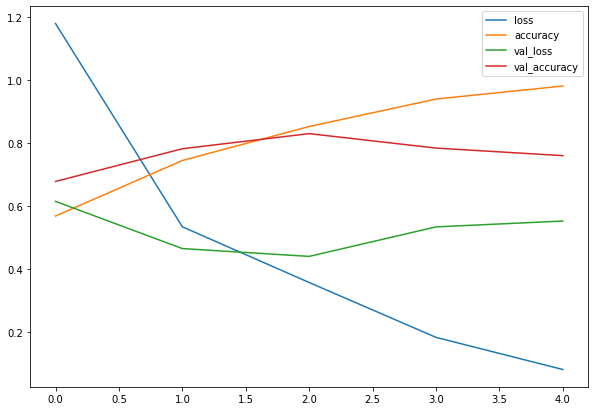

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# Experiment with the old model
Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

In [ ]:
tf.random.set_seed(42)

model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 278ms/step - loss: 0.6107 - accuracy: 0.6660 - val_loss: 0.4674 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4706 - accuracy: 0.7780 - val_loss: 0.3730 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4303 - accuracy: 0.7967 - val_loss: 0.3492 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3927 - accuracy: 0.8293 - val_loss: 0.3135 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3773 - accuracy: 0.8380 - val_loss: 0.3134 - val_accuracy: 0.8840


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

#Data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

train_datagen = ImageDataGenerator(rescale=1/255.) 

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_part,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

test_data = test_datagen.flow_from_directory(test_part,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

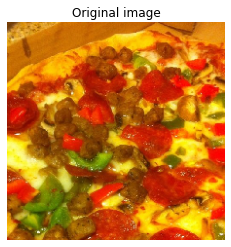

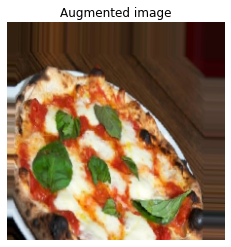

In [ ]:
random_number = random.randint(0, 32) 
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

## Creating a model with data augumented

In [ ]:
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 538ms/step - loss: 0.7392 - accuracy: 0.5247 - val_loss: 0.6811 - val_accuracy: 0.5160
Epoch 2/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6945 - accuracy: 0.5527 - val_loss: 0.6760 - val_accuracy: 0.6640
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6859 - accuracy: 0.5833 - val_loss: 0.6315 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.6593 - accuracy: 0.6387 - val_loss: 0.5561 - val_accuracy: 0.7240
Epoch 5/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6324 - accuracy: 0.6480 - val_loss: 0.5296 - val_accuracy: 0.7020


##Shuffle the data which is augumented

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_part,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) 

Found 1500 images belonging to 2 classes.


In [ ]:
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_4.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 550ms/step - loss: 0.6523 - accuracy: 0.6167 - val_loss: 0.4817 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5587 - accuracy: 0.7287 - val_loss: 0.4297 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5329 - accuracy: 0.7273 - val_loss: 0.3894 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4971 - accuracy: 0.7700 - val_loss: 0.3847 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 26s 554ms/step - loss: 0.4897 - accuracy: 0.7620 - val_loss: 0.3588 - val_accuracy: 0.8440


#Hyperparameter Tuning

In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 41s 857ms/step - loss: 0.6734 - accuracy: 0.5700 - val_loss: 0.5761 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 26s 559ms/step - loss: 0.5872 - accuracy: 0.6780 - val_loss: 0.4819 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 26s 558ms/step - loss: 0.5657 - accuracy: 0.7200 - val_loss: 0.4829 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 26s 561ms/step - loss: 0.5499 - accuracy: 0.7053 - val_loss: 0.4465 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 27s 572ms/step - loss: 0.5403 - accuracy: 0.7320 - val_loss: 0.4492 - val_accuracy: 0.7800


In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

##Making Predictions

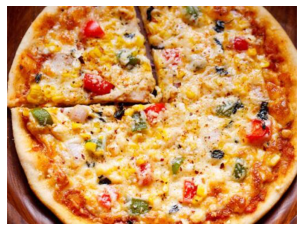

In [ ]:
steak = mpimg.imread("/content/drive/MyDrive/pizza.jpg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

##Adding dimensions to the image

In [ ]:
steak = tf.expand_dims(steak, axis=0)

In [ ]:
pred = model_5.predict(steak)
pred

array([[0.82794863]], dtype=float32)

##Converting probability into class name

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

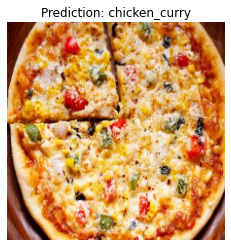

In [ ]:
pred_and_plot(model_5, "/content/drive/MyDrive/pizza.jpg", class_names)

#Working with a big dataset

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

model_6.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_6 = model_6.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 243ms/step - loss: 2.1440 - accuracy: 0.2147 - val_loss: 2.0067 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 67s 283ms/step - loss: 1.9221 - accuracy: 0.3340 - val_loss: 1.9182 - val_accuracy: 0.3260
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 1.6605 - accuracy: 0.4445 - val_loss: 1.8911 - val_accuracy: 0.3464
Epoch 4/5
235/235 [==============================] - 57s 241ms/step - loss: 1.2310 - accuracy: 0.5891 - val_loss: 2.1816 - val_accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 63s 270ms/step - loss: 0.6985 - accuracy: 0.7721 - val_loss: 2.6991 - val_accuracy: 0.2976


In [ ]:
model_6.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 2.6991 - accuracy: 0.2976


[2.699130058288574, 0.29760000109672546]

#Adjust model Parameters

In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_7.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_7 = model_7.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 214ms/step - loss: 2.1436 - accuracy: 0.2355 - val_loss: 2.0370 - val_accuracy: 0.2788
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.7839 - accuracy: 0.3968 - val_loss: 1.9293 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 50s 212ms/step - loss: 1.3691 - accuracy: 0.5537 - val_loss: 1.9851 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 0.8476 - accuracy: 0.7381 - val_loss: 2.3452 - val_accuracy: 0.2928
Epoch 5/5
235/235 [==============================] - 51s 218ms/step - loss: 0.4089 - accuracy: 0.8872 - val_loss: 2.7769 - val_accuracy: 0.3040


#Data Augmnetation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_8 = tf.keras.models.clone_model(model_7)

model_8.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 143s 606ms/step - loss: 2.2599 - accuracy: 0.1808 - val_loss: 2.0406 - val_accuracy: 0.2992
Epoch 2/5
235/235 [==============================] - 125s 531ms/step - loss: 2.0668 - accuracy: 0.2685 - val_loss: 1.9679 - val_accuracy: 0.3100
Epoch 3/5
235/235 [==============================] - 124s 526ms/step - loss: 2.0078 - accuracy: 0.3035 - val_loss: 1.8995 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 122s 521ms/step - loss: 1.9735 - accuracy: 0.3135 - val_loss: 1.8250 - val_accuracy: 0.3860
Epoch 5/5
235/235 [==============================] - 123s 525ms/step - loss: 1.9396 - accuracy: 0.3327 - val_loss: 1.8294 - val_accuracy: 0.3624


##Plotting Images

In [ ]:
pred_and_plot(model_8, "/content/drive/MyDrive/pizza.jpg", class_names)

In [ ]:
img = load_and_prep_image("/content/drive/MyDrive/pizza.jpg")

pred = model_8.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
pred = model_8.predict(tf.expand_dims(img, axis=0))
pred

In [ ]:
class_names[pred.argmax()]